## Testing methods of LinearRegression class: OLS

OLS equation (inversion)
OLSfit: [3.97781344 2.98666623]
OLSequ: [3.97781344 2.98666623]

My GD:
GD: [3.97781344 2.98666623]
fitGD: [3.97781344 2.98666623]
My SGD:
SGD: [3.76028844 3.13171958]
fitSGD: [3.73872993 3.1203173 ]
sgdreg from scikit
GD_SK: [3.91032018 3.05079001]
fitSGD_SK: [4.01498677 2.94084519]
3.9778134375617222
1.9836426541695293


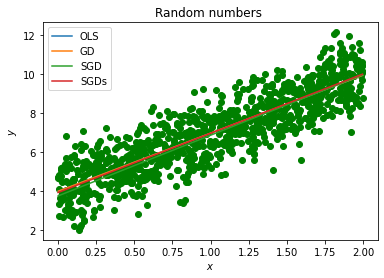

In [3]:
import dataset
import regression

%matplotlib inline

# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

degree=1
n = 1000
x = np.reshape(np.sort(2*np.random.rand(n)), (n,1))
y = 4+3*x**degree+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x]

############ Prepare my model
model=regression.OLSRegression(X,y.ravel())
intercept = model.split().fit()[0]
std = np.std(model.y_train)

scale=False
if scale: 
    model.rescale()

X_train=model.X_train
y_train=model.y_train#.reshape(-1,1)

########### 1) Normal equation #############################
beta_linreg = np.linalg.pinv(X_train.T @ X_train) @ (X_train.T @ y_train)
############ Test my OLS equation
beta_linreg_my = model.fit()

print("OLS equation (inversion)")
print("OLSfit:", beta_linreg_my)
print("OLSequ:", beta_linreg)

########### 2) GD #############################

theta_GD = np.random.randn(X_train.shape[1])
eta = 0.1
Niterations = 1000

for iter in range(Niterations):
    gradients = 2.0/n * X_train.T @ ((X_train @ theta_GD) - y_train)
    theta_GD -= eta*gradients
  
print()
theta_GD_my = model.fitGD(eta=eta, Niterations = Niterations)
print("My GD:")
print("GD:", theta_GD)
print("fitGD:", theta_GD_my)


########### 3) SGD my #############################
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta_SGD = np.random.randn(X_train.shape[1])

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_train[random_index:random_index+1]
        yi = y_train[random_index:random_index+1]
        gradients = 2.0 * xi.T @ ((xi @ theta_SGD)-yi)
        eta = learning_schedule(epoch*m+i)
        theta_SGD = theta_SGD - eta*gradients
        
theta_SGD_my = model.fitSGD(n_epochs,m,t0,t1)
print("My SGD:")
print("SGD:", theta_SGD)
print("fitSGD:", theta_SGD_my)

########### 4) SGD_SK ##################################
sgdreg = SGDRegressor(max_iter = 500, penalty=None, eta0=0.1,fit_intercept=False)
sgdreg.fit(X, y.ravel())
print("sgdreg from scikit")

beta_SGDs = sgdreg.coef_
if scale: # activati if rescale() on
    beta_SGDs[0] = sgdreg.intercept_
            
beta_SGDs_my = model.fitSGD_SK(max_iter = 500, penalty=None, eta0=0.1)
print("GD_SK:", beta_SGDs)
print("fitSGD_SK:", beta_SGDs_my)





if scale:
    y=y-intercept
plt.plot(x, y ,'go') 

"""
std_x=np.std(x)
m_x=np.mean(x)
scaler_X = StandardScaler()
scaler_X.fit(x)
x = scaler_X.transform(x)

m_y=np.mean(y)
std_y=np.std(y)
scaler_y = StandardScaler()
y2 = scaler_y.fit_transform(y.reshape(-1, 1)) #scaler_y.fit_transform(y_train) #"""

print(intercept)
print(std)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = X.dot(theta_GD)
ypredict2 = X.dot(beta_linreg)
ypredict3 = X.dot(theta_SGD_my)
ypredict4 = X.dot(beta_SGDs)
plt.plot(x, ypredict2, label = "OLS")
plt.plot(x, ypredict, label = "GD")
plt.plot(x, ypredict3, label = "SGD")
plt.plot(x, ypredict4, label = "SGDs")


#plt.plot(m_x*std_x, m_y+y2.ravel()*std_y ,'ro')
#plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.legend()
plt.show()

Perfect for simple linear regression... but for more complex polynomial??

OLS equation (inversion)
OLSfit: [ 0.         -0.80852578  0.69631231  2.82889447]
OLSequ: [ 0.         -0.80852578  0.69631231  2.82889447]

My GD:
GD: [ 0.09005396 -0.67150712  0.53534159  2.88036035]
fitGD: [-2.48548404 -0.32122727  0.1237829   3.01195428]
My SGD:
SGD: [-1.33297835  0.09944347 -0.43665504  3.22553063]
fitSGD: [-1.34879897 -0.23262433 -0.11207067  3.13626679]
sgdreg from scikit
GD_SK: [ 0.         -0.15305927  0.18717633  3.11269694]
fitSGD_SK: [ 0.         -0.64372613  0.49538663  2.94088354]
4.249455436057136
6.847680946488476


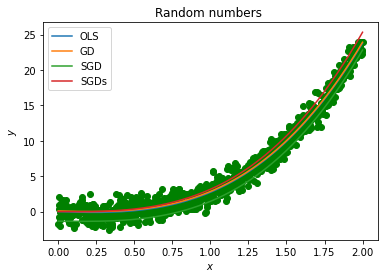

In [2]:
import dataset
import regression

%matplotlib inline

# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler

degree=3
n = 1000
x = np.reshape(np.sort(2*np.random.rand(n)), (n,1))
y = 4+3*x**degree+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2, x**3]

############ Prepare my model
model=regression.OLSRegression(X,y.ravel())
intercept = model.split().fit()[0]
std = np.std(model.y_train)

scale=True
if scale: 
    model.rescale()

X_train=model.X_train
y_train=model.y_train#.reshape(-1,1)

########### 1) Normal equation #############################
beta_linreg = np.linalg.pinv(X_train.T @ X_train) @ (X_train.T @ y_train)
############ Test my OLS equation
beta_linreg_my = model.fit()

print("OLS equation (inversion)")
print("OLSfit:", beta_linreg_my)
print("OLSequ:", beta_linreg)

########### 2) GD #############################

theta_GD = np.random.randn(X_train.shape[1])
eta = 0.1
Niterations = 1000

for iter in range(Niterations):
    gradients = 2.0/n * X_train.T @ ((X_train @ theta_GD) - y_train)
    theta_GD -= eta*gradients
  
print()
theta_GD_my = model.fitGD(eta=eta, Niterations=Niterations)
print("My GD:")
print("GD:", theta_GD)
print("fitGD:", theta_GD_my)


########### 3) SGD my #############################
n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50

def learning_schedule(t):
    return t0/(t+t1)

theta_SGD = np.random.randn(X_train.shape[1])

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_train[random_index:random_index+1]
        yi = y_train[random_index:random_index+1]
        gradients = 2.0 * xi.T @ ((xi @ theta_SGD)-yi)
        eta = learning_schedule(epoch*m+i)
        theta_SGD = theta_SGD - eta*gradients
        
theta_SGD_my = model.fitSGD(n_epochs,m,t0,t1)
print("My SGD:")
print("SGD:", theta_SGD)
print("fitSGD:", theta_SGD_my)

########### 4) SGD_SK ##################################
sgdreg = SGDRegressor(max_iter = 500, penalty=None, eta0=0.1,fit_intercept=False)
sgdreg.fit(X, y.ravel())
print("sgdreg from scikit")

beta_SGDs = sgdreg.coef_
if scale: # activati if rescale() on
    beta_SGDs[0] = sgdreg.intercept_
            
beta_SGDs_my = model.fitSGD_SK(max_iter = 500, penalty=None, eta0=0.1)
print("GD_SK:", beta_SGDs)
print("fitSGD_SK:", beta_SGDs_my)






plt.plot(x, y-intercept ,'go') 

"""
std_x=np.std(x)
m_x=np.mean(x)
scaler_X = StandardScaler()
scaler_X.fit(x)
x = scaler_X.transform(x)

m_y=np.mean(y)
std_y=np.std(y)
scaler_y = StandardScaler()
y2 = scaler_y.fit_transform(y.reshape(-1, 1)) #scaler_y.fit_transform(y_train) #"""

print(intercept)
print(std)

xnew = np.array([[0],[2]])
Xnew = np.c_[np.ones((2,1)), xnew]
ypredict = X.dot(theta_GD)
ypredict2 = X.dot(beta_linreg)
ypredict3 = X.dot(theta_SGD_my)
ypredict4 = X.dot(beta_SGDs)
plt.plot(x, ypredict2, label = "OLS")
plt.plot(x, ypredict, label = "GD")
plt.plot(x, ypredict3, label = "SGD")
plt.plot(x, ypredict4, label = "SGDs")


#plt.plot(m_x*std_x, m_y+y2.ravel()*std_y ,'ro')
#plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.legend()
plt.show()

Own inversion
[[ 3.8052909 ]
 [ 0.72482318]
 [-0.77770749]
 [ 3.22536286]]
sgdreg from scikit
[-0.5372515] [11.0645788]
theta from own gd
[[nan]
 [nan]
 [nan]
 [nan]]
theta from own sdg
[[3.62348689]
 [1.4345366 ]
 [0.86699645]
 [1.58668678]]


/Users/adelezaini/anaconda3/envs/tf/lib/python3.7/site-packages/ipykernel_launcher.py:32: RuntimeWarning: invalid value encountered in subtract


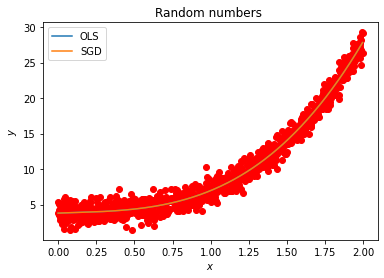

In [31]:
%matplotlib inline

# Importing various packages
from math import exp, sqrt
from random import random, seed
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor

degree=3
n = 1000
x = np.reshape(np.sort(2*np.random.rand(n)), (n,1))
y = 4+3*x**degree+np.random.randn(n,1)

X = np.c_[np.ones((n,1)), x, x**2, x**3]
theta_linreg = np.linalg.inv(X.T @ X) @ (X.T @ y)
print("Own inversion")
print(theta_linreg)
sgdreg = SGDRegressor(max_iter = 50, penalty=None, eta0=0.1)
sgdreg.fit(x,y.ravel())
print("sgdreg from scikit")
print(sgdreg.intercept_, sgdreg.coef_)


theta = np.random.randn(degree+1,1)
eta = 0.1
Niterations = 1000


for iter in range(Niterations):
    gradients = 2.0/n * X.T @ ((X @ theta)-y)
    theta -= eta*gradients
print("theta from own gd")
print(theta)

#xnew = np.array([[0],[2]])
#Xnew = np.c_[np.ones((2,1)), xnew, xnew**2, xnew**3]
ypredict = X.dot(theta)
ypredict2 = X.dot(theta_linreg)


n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches
t0, t1 = 5, 50
def learning_schedule(t):
    return t0/(t+t1)

theta = np.random.randn(degree+1,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2.0 * xi.T @ ((xi @ theta)-yi)
        eta = learning_schedule(epoch*m+i)
        theta = theta - eta*gradients
print("theta from own sdg")
print(theta)

plt.plot(x, y ,'ro')
ypredict3 = X.dot(theta)
#plt.plot(x, ypredict, label="GD")
plt.plot(x, ypredict2, label="OLS")
plt.plot(x, ypredict2, label="SGD")

#plt.axis([0,2.0,0, 15.0])
plt.xlabel(r'$x$')
plt.ylabel(r'$y$')
plt.title(r'Random numbers ')
plt.legend()
plt.show()

In [ ]:
import numpy as np
from random import random, seed
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
from sklearn.model_selection import train_test_split

In [11]:
a = np.array([[1,5],[3,4]])
print(np.argmax(a))

print(np.array(np.where(a == a.max())).flatten())

1
[0 1]


In [33]:
# The MIT License (MIT)
#
# Copyright © 2021 Adele Zaini
#
# Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated
# documentation files (the “Software”), to deal in the Software without restriction, including without limitation the
# rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software,
# and to permit persons to whom the Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in all copies or substantial portions of
# the Software. THE SOFTWARE IS PROVIDED “AS IS”, WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT
# LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT
# SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF
# CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS
# IN THE SOFTWARE.

import numpy as np
from random import random, seed


np.random.seed(1234)

# Degree of the polynomial
degree=5
# Datapoints (squared root of datapoints -> meshgrid)
n = 25
# Paramaters of noise distribution
mu_n = 0; sigma_n = 0.1

# Create vanilla dataset:
x,y,z = create_xyz_dataset(n,mu_n, sigma_n)
Plot_FrankeFunction(x,y,z, title="Original dataset: : \nFranke Function with stochastic noise")
# Convertion because of meshgrid
z = z.ravel(); n=n**2
X = create_X(x, y, degree)

n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches

# Default value
model=OLSRegression(X,z)
beta = model.split().rescale().fitSGD(n_epochs = n_epochs, m = m)
print("Performance with default values: t0, t1 = 5, 50")
print("––––––––––––––––––––––––––––––––––––––––––––")
print("Train MSE:", model.MSE_train())
print("Test MSE:", model.MSE_test())
print("––––––––––––––––––––––––––––––––––––––––––––")
print("Train R2:", model.R2_train())
print("Test R2:", model.R2_test())
print("––––––––––––––––––––––––––––––––––––––––––––")

n_epochs = 50
M = 5   #size of each minibatch
m = int(n/M) #number of minibatches

t0_vals = [0.05, 0.1, 0.5, 1, 5, 10, 25]
t1_vals = [1, 3, 12, 26, 50, 100, 120]

mse_train = np.zeros((len(t0_vals), len(t1_vals)))
mse_test = np.zeros((len(t0_vals), len(t1_vals)))

for i in range(len(t0_vals)):
    for j in range(len(t1_vals)):
    
        model.fitSGD(n_epochs, m, t0_vals[i], t1_vals[j])

        mse_train = model.MSE_train()
        mse_test = model.MSE_test()
    
import seaborn as sns

sns.set()

def fin_min_indexes(A):
      return np.array(np.where(A == A.min())).flatten()
        
fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(mse_train, annot=True, ax=ax, cmap="viridis")
ax.set_title("Training Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()

fig, ax = plt.subplots(figsize = (10, 10))
sns.heatmap(mse_test, annot=True, ax=ax, cmap="viridis")
ax.set_title("Test Accuracy")
ax.set_ylabel("$\eta$")
ax.set_xlabel("$\lambda$")
plt.show()


NameError: name 'create_xyz_dataset' is not defined

In [3]:
np.random.seed(1234)

# Degree of the polynomial
degree=5
# Datapoints (squared root of datapoints -> meshgrid)
n = 25
# Paramaters of noise distribution
mu = 0; sigma = 0.1
# Parameter of splitting data
test_size = 0.2

x,y,z=create_xyz_dataset(n,mu,sigma)
#Plot_FrankeFunction(x,y,z)
z=z.ravel()
X=create_X(x,y,degree)

model=OLSRegression(X,z)
model.split().rescale()

beta = model.fit()
print(beta[:10])
z_tilde = model.predict_train()
z_predict = model.predict_test()
print(z_tilde[:10])
print(z_predict[:10])

"""
prec=4
print("––––––––––––––––––––––––––––––––––––––––––––")
print("Train MSE:", np.round(MSE(z_train,z_tilde),prec))
print("Test MSE:", np.round(MSE(z_test,z_predict),prec))
print("––––––––––––––––––––––––––––––––––––––––––––")
print("Train R2:", np.round(R2(z_train,z_tilde),prec))
print("Test R2:", np.round(R2(z_test,z_predict),prec))
print("––––––––––––––––––––––––––––––––––––––––––––")
"""
print("––––––––––––––––––––––––––––––––––––––––––––")
print("Train MSE:", model.MSE_train())
print("Test MSE:", model.MSE_test())
print("––––––––––––––––––––––––––––––––––––––––––––")
print("Train R2:", model.R2_train())
print("Test R2:", model.R2_test())
print("––––––––––––––––––––––––––––––––––––––––––––")
# Confidence interval
beta1, beta2 = model.Confidence_Interval(0.1)
print("––––––––––––––––––––––––––––––––––––––––––––")

[  0.           6.0240481    2.77833014 -27.41271571 -11.59605851
  -4.54493467  38.33903483  34.4407874   17.5722142  -16.00905112]
[-0.29419307 -0.0832303  -0.25361917  0.30578607 -0.08940484  0.35642934
 -0.19681158  0.5963452  -0.15675562  0.23819927]
[-0.2410186   0.03289853 -0.32184282 -0.29944618  0.41458793  0.23171393
  0.10950287 -0.07146335  0.67845615 -0.33666404]
––––––––––––––––––––––––––––––––––––––––––––
Train MSE: 0.0113
Test MSE: 0.0111
––––––––––––––––––––––––––––––––––––––––––––
Train R2: 0.8808
Test R2: 0.8678
––––––––––––––––––––––––––––––––––––––––––––
Confidence interval of β-estimator at 95 %:


,$β_{-}$,$β_{ols}$,$β_{+}$
0,-0.000,0.000,0.000
1,6.022,6.024,6.026
2,2.776,2.778,2.780
3,-27.422,-27.413,-27.403
4,-11.603,-11.596,-11.589
5,-4.554,-4.545,-4.535
6,38.317,38.339,38.361
7,34.425,34.441,34.457
8,17.556,17.572,17.588
9,-16.031,-16.009,-15.987


––––––––––––––––––––––––––––––––––––––––––––


In [103]:
np.random.seed(1234)

# Degree of the polynomial
degree=5
# Datapoints (squared root of datapoints -> meshgrid)
n = 25
# Paramaters of noise distribution
mu = 0; sigma = 0.1
# Parameter of splitting data
test_size = 0.2

x,y,z=create_xyz_dataset(n,mu,sigma)
#Plot_FrankeFunction(x,y,z)
z=z.ravel()
X=create_X(x,y,degree)

X_train, X_test, z_train, z_test = Split_and_Scale(X,np.ravel(z)) #StardardScaler, test_size=0.2, scale=true
print(X_train[:1])
print(X_test[:1])
print(z_train[:2])
print(z_test[:2])

ols_beta, z_tilde,z_predict = OLS_solver(X_train, X_test, z_train, z_test)

print(ols_beta[:10])
print(z_tilde[:10])
print(z_predict[:10])

prec=4
print("––––––––––––––––––––––––––––––––––––––––––––")
print("Train MSE:", np.round(MSE(z_train,z_tilde),prec))
print("Test MSE:", np.round(MSE(z_test,z_predict),prec))
print("––––––––––––––––––––––––––––––––––––––––––––")
print("Train R2:", np.round(R2(z_train,z_tilde),prec))
print("Test R2:", np.round(R2(z_test,z_predict),prec))
print("––––––––––––––––––––––––––––––––––––––––––––")

[[ 0.          0.08033333  0.21241667 -0.004625    0.16577083  0.16637153
  -0.06782841  0.07257494  0.12575231  0.09994083 -0.10346354  0.01118949
   0.05754982  0.08036039  0.04393807 -0.12024953 -0.02415488  0.01295761
   0.03514108  0.04366974  0.00213328]]
[[ 0.         -0.08633333  0.17075    -0.17129167  0.03035417  0.10907986
  -0.19398582 -0.05271441  0.0182581   0.04084071 -0.18911169 -0.08118609
  -0.03601934 -0.0034974  -0.01027019 -0.17523442 -0.08607818 -0.05448448
  -0.03435209 -0.02087356 -0.04449469]]
[-0.30980687  0.03407068]
[-0.32305563  0.00526445]
[  0.           6.0240481    2.77833014 -27.41271571 -11.59605851
  -4.54493467  38.33903483  34.4407874   17.5722142  -16.00905112]
[-0.29419307 -0.0832303  -0.25361917  0.30578607 -0.08940484  0.35642934
 -0.19681158  0.5963452  -0.15675562  0.23819927]
[-0.2410186   0.03289853 -0.32184282 -0.29944618  0.41458793  0.23171393
  0.10950287 -0.07146335  0.67845615 -0.33666404]
––––––––––––––––––––––––––––––––––––––––––––


In [4]:
def scale_Xz(X_train, X_test, z_train, z_test, with_std=False):
    scaler_X = StandardScaler(with_std=with_std) #with_std=False
    scaler_X.fit(X_train)
    X_train = scaler_X.transform(X_train)
    X_test = scaler_X.transform(X_test)

    scaler_z = StandardScaler(with_std=with_std) #with_std=False
    z_train = np.squeeze(scaler_z.fit_transform(z_train.reshape(-1, 1))) #scaler_z.fit_transform(z_train) #
    z_test = np.squeeze(scaler_z.transform(z_test.reshape(-1, 1))) #scaler_z.transform(z_test) #  
    return X_train, X_test, z_train, z_test

# Splitting and rescaling data (rescaling is optional)
# Default values: 20% of test data and the scaler is StandardScaler without std.dev.
def Split_and_Scale(X,z,test_size=0.2, scale=True, with_std=False):

    #Splitting training and test data
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size=test_size)

    # Rescaling X and z (optional)
    if scale:
        X_train, X_test, z_train, z_test = scale_Xz(X_train, X_test, z_train, z_test, with_std=with_std)
      
    return X_train, X_test, z_train, z_test

# OLS equation
def OLS_solver(X_train, X_test, z_train, z_test):

    # Calculating Beta Ordinary Least Square Equation with matrix pseudoinverse
    # Altervatively to Numpy pseudoinverse it is possible to use the SVD theorem to evalute the inverse of a matrix (even in case it is singular). Just replace 'np.linalg.pinv' with 'SVDinv'.
    ols_beta = np.linalg.pinv(X_train.T @ X_train) @ X_train.T @ z_train

    z_tilde = X_train @ ols_beta # z_prediction of the train data
    z_predict = X_test @ ols_beta # z_prediction of the test data
  
    return ols_beta, z_tilde, z_predict
    
def ridge_reg(X_train, X_test, z_train, z_test, lmd = 10**(-12)):
 
    ridge_beta = np.linalg.pinv(X_train.T @ X_train + lmd*np.eye(len(X_train.T))) @ X_train.T @ z_train #psudoinverse
    z_model = X_train @ ridge_beta #calculates model
    z_predict = X_test @ ridge_beta

    #finds the lambda that gave the best MSE
    #best_lamda = lambdas[np.where(MSE_values == np.min(MSE_values))[0]]

    return ridge_beta, z_model, z_predict
    
def lasso_reg(X_train, X_test, z_train, z_test, lmd = 10**(-12)):

    RegLasso = linear_model.Lasso(lmd)
    _ = RegLasso.fit(X_train,z_train)
    z_model = RegLasso.predict(X_train)
    z_predict = RegLasso.predict(X_test)

    return z_model, z_predict